# 宏观地理分布分析

1. 统计分析省份/城市的地理标志产品数量

2. 展示不同地理标志产品的地理分布

3. 统计分析省份/城市地理标志产品的多样性

In [1]:
import os
import json
from src import *
from pprint import pprint
from collections import Counter

# 绘图输出目录
figure_dir = "figures"
os.makedirs(figure_dir, exist_ok=True)

# 读取产品数据
products = json.load(open('tokenized_products.json', 'r', encoding='utf-8'))

## 统计分析

统计分析每个省份/城市的地理标志产品数量。

从结果可以看出:

+ 产品最多的省份是四川省，有388个产品

+ 产品最少的省份是天津市，有16个产品。

+ 产品最多的城市是成都市，有70个产品

前5个省份地理标志产品数量: [('四川省', 388), ('湖北省', 333), ('山东省', 309), ('广西壮族自治区', 232), ('广东省', 208)]
后5个省份地理标志产品数量: [('宁夏回族自治区', 51), ('海南省', 48), ('北京市', 22), ('上海市', 21), ('天津市', 16)]
前5个城市地理标志产品数量: [('成都市', 70), ('重庆市', 65), ('黄冈市', 62), ('青岛市', 48), ('十堰市', 48)]
后5个城市地理标志产品数量: [('果洛藏族自治州', 1), ('克拉玛依市', 1), ('临高县', 1), ('新余市', 1), ('鄂州市', 1)]
柱状图已保存至: figures\地理标志产品地理分布柱状图.png


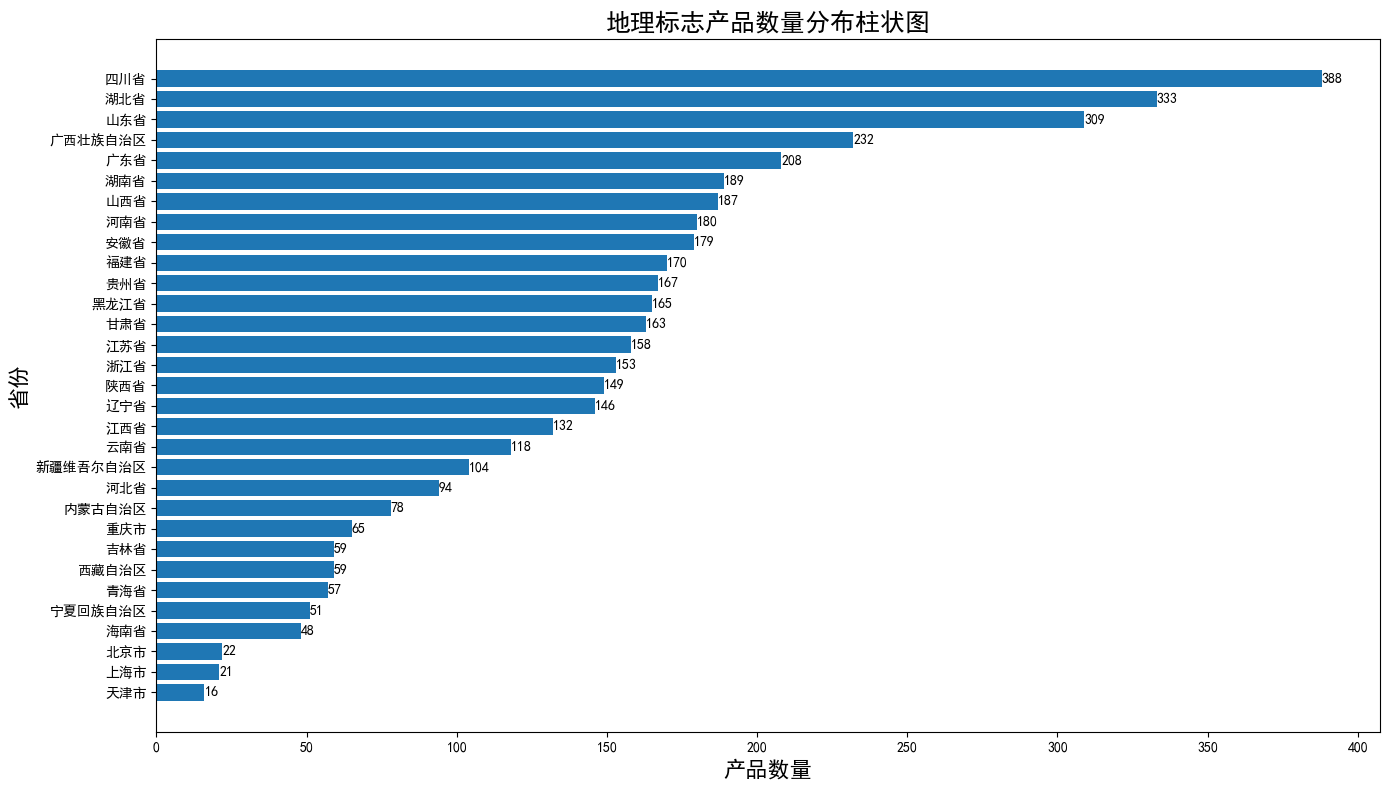

In [2]:
# 统计省份级产品
province_product_count = product_count_province_level(products)
print("前5个省份地理标志产品数量:", province_product_count[:5])
print("后5个省份地理标志产品数量:", province_product_count[-5:])

# 统计城市级产品
city_product_count = product_count_city_level(products)
print("前5个城市地理标志产品数量:", city_product_count[:5])
print("后5个城市地理标志产品数量:", city_product_count[-5:])

# 绘制柱状图
province_bar_plot(province_product_count[::-1], os.path.join(figure_dir, "地理标志产品地理分布柱状图.png"))


## 地理分布

针对热门类别的产品（例如大米、水果）, 以热力图的形式展示其在不同**省份**的分布情况。

下面先分析哪一些产品比较多：

In [3]:
# 读取产品数据
products = json.load(open('products.json', 'r', encoding='utf-8'))

# 对产品名称进行jieba分词
product_name_cut = [
    word
    for product in products
    if product.get("product_name")
    for word in tokenize(product["product_name"])
]

# 统计产品名称分词后的出现次数, 并按数量降序排序
product_name_cut_ount = Counter(product_name_cut).most_common()
pprint(product_name_cut_ount[:20])


[('茶', 117),
 ('大米', 114),
 ('苹果', 66),
 ('葡萄', 63),
 ('西瓜', 61),
 ('小米', 55),
 ('核桃', 49),
 ('花生', 47),
 ('辣椒', 43),
 ('鸡', 38),
 ('马铃薯', 35),
 ('猪', 35),
 ('蜂蜜', 35),
 ('酒', 34),
 ('绿茶', 31),
 ('大蒜', 31),
 ('红', 30),
 ('羊肉', 29),
 ('梨', 28),
 ('猕猴桃', 27)]


可以看到，出现次数前10的产品名称分词为

```
茶、大米、苹果、葡萄、西瓜、小米、核桃、花生、 辣椒、 鸡
```

接着以热力图的形式，分析这些产品在不同省份的分布情况。

In [4]:
# 出现次数前10的产品名称分词
name_list = ["茶","大米","苹果", "葡萄", "西瓜", "小米", "核桃", "花生", "辣椒", "鸡"]

# 用于绘制省级热力图的字典
heatmap_dict = {"地理标志产品数量": product_count_province_level(products)}
heatmap_dict.update({
    name: name_count_provice_level(products, name) for name in name_list
})

province_heatmap_plot(heatmap_dict, figure_dir)

热力图已保存至: figures\地理标志产品地理分布热力图.html


以辣椒为例，辣椒在不同省份的分布情况如下。

可以看到，在东南沿海的浙江省、福建省、广东省没有辣椒产品，与这些地区人民不吃辣的习惯相关。

而最辣的省份是湖南省，符合生活常识。

![](figures/地理标志产品数量地理分布热力图_辣椒.jpeg)


## 多样性可视化

使用词云图展示每个省份的地理标志产品，以表现其多样性。

同样的，先使用``jieba``对产品名称进行分词，然后使用``hanlp``对分词结果进行词性标注，筛选出需要的词性。

